In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

<AxesSubplot:>

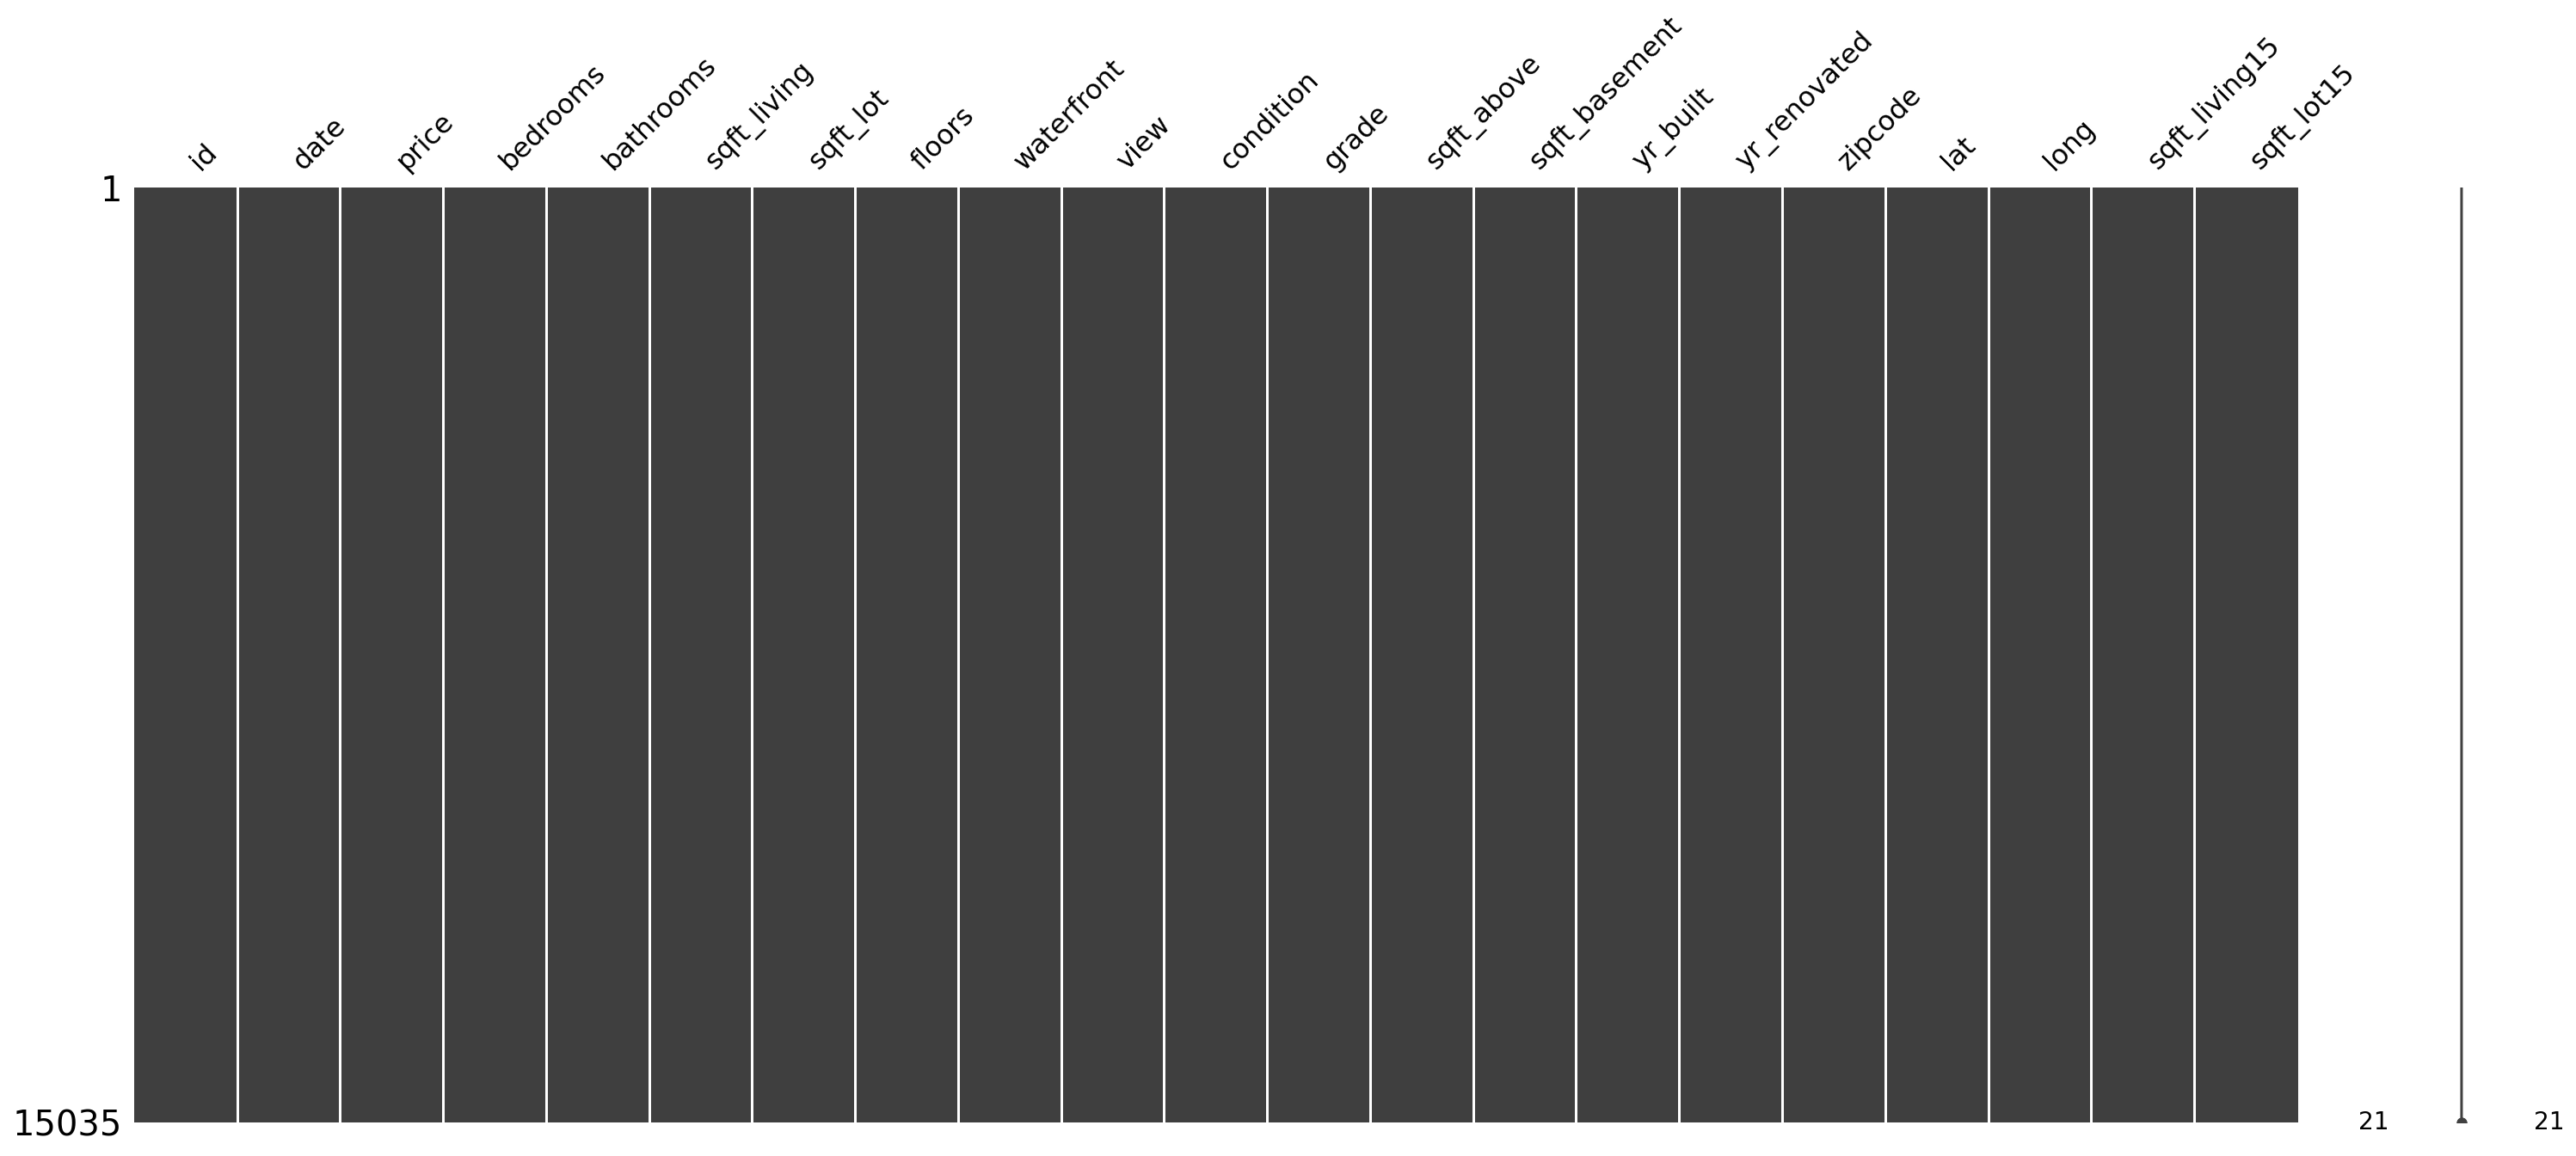

In [4]:
msno.matrix(train)

In [5]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [7]:
del train['id']
del test['id']

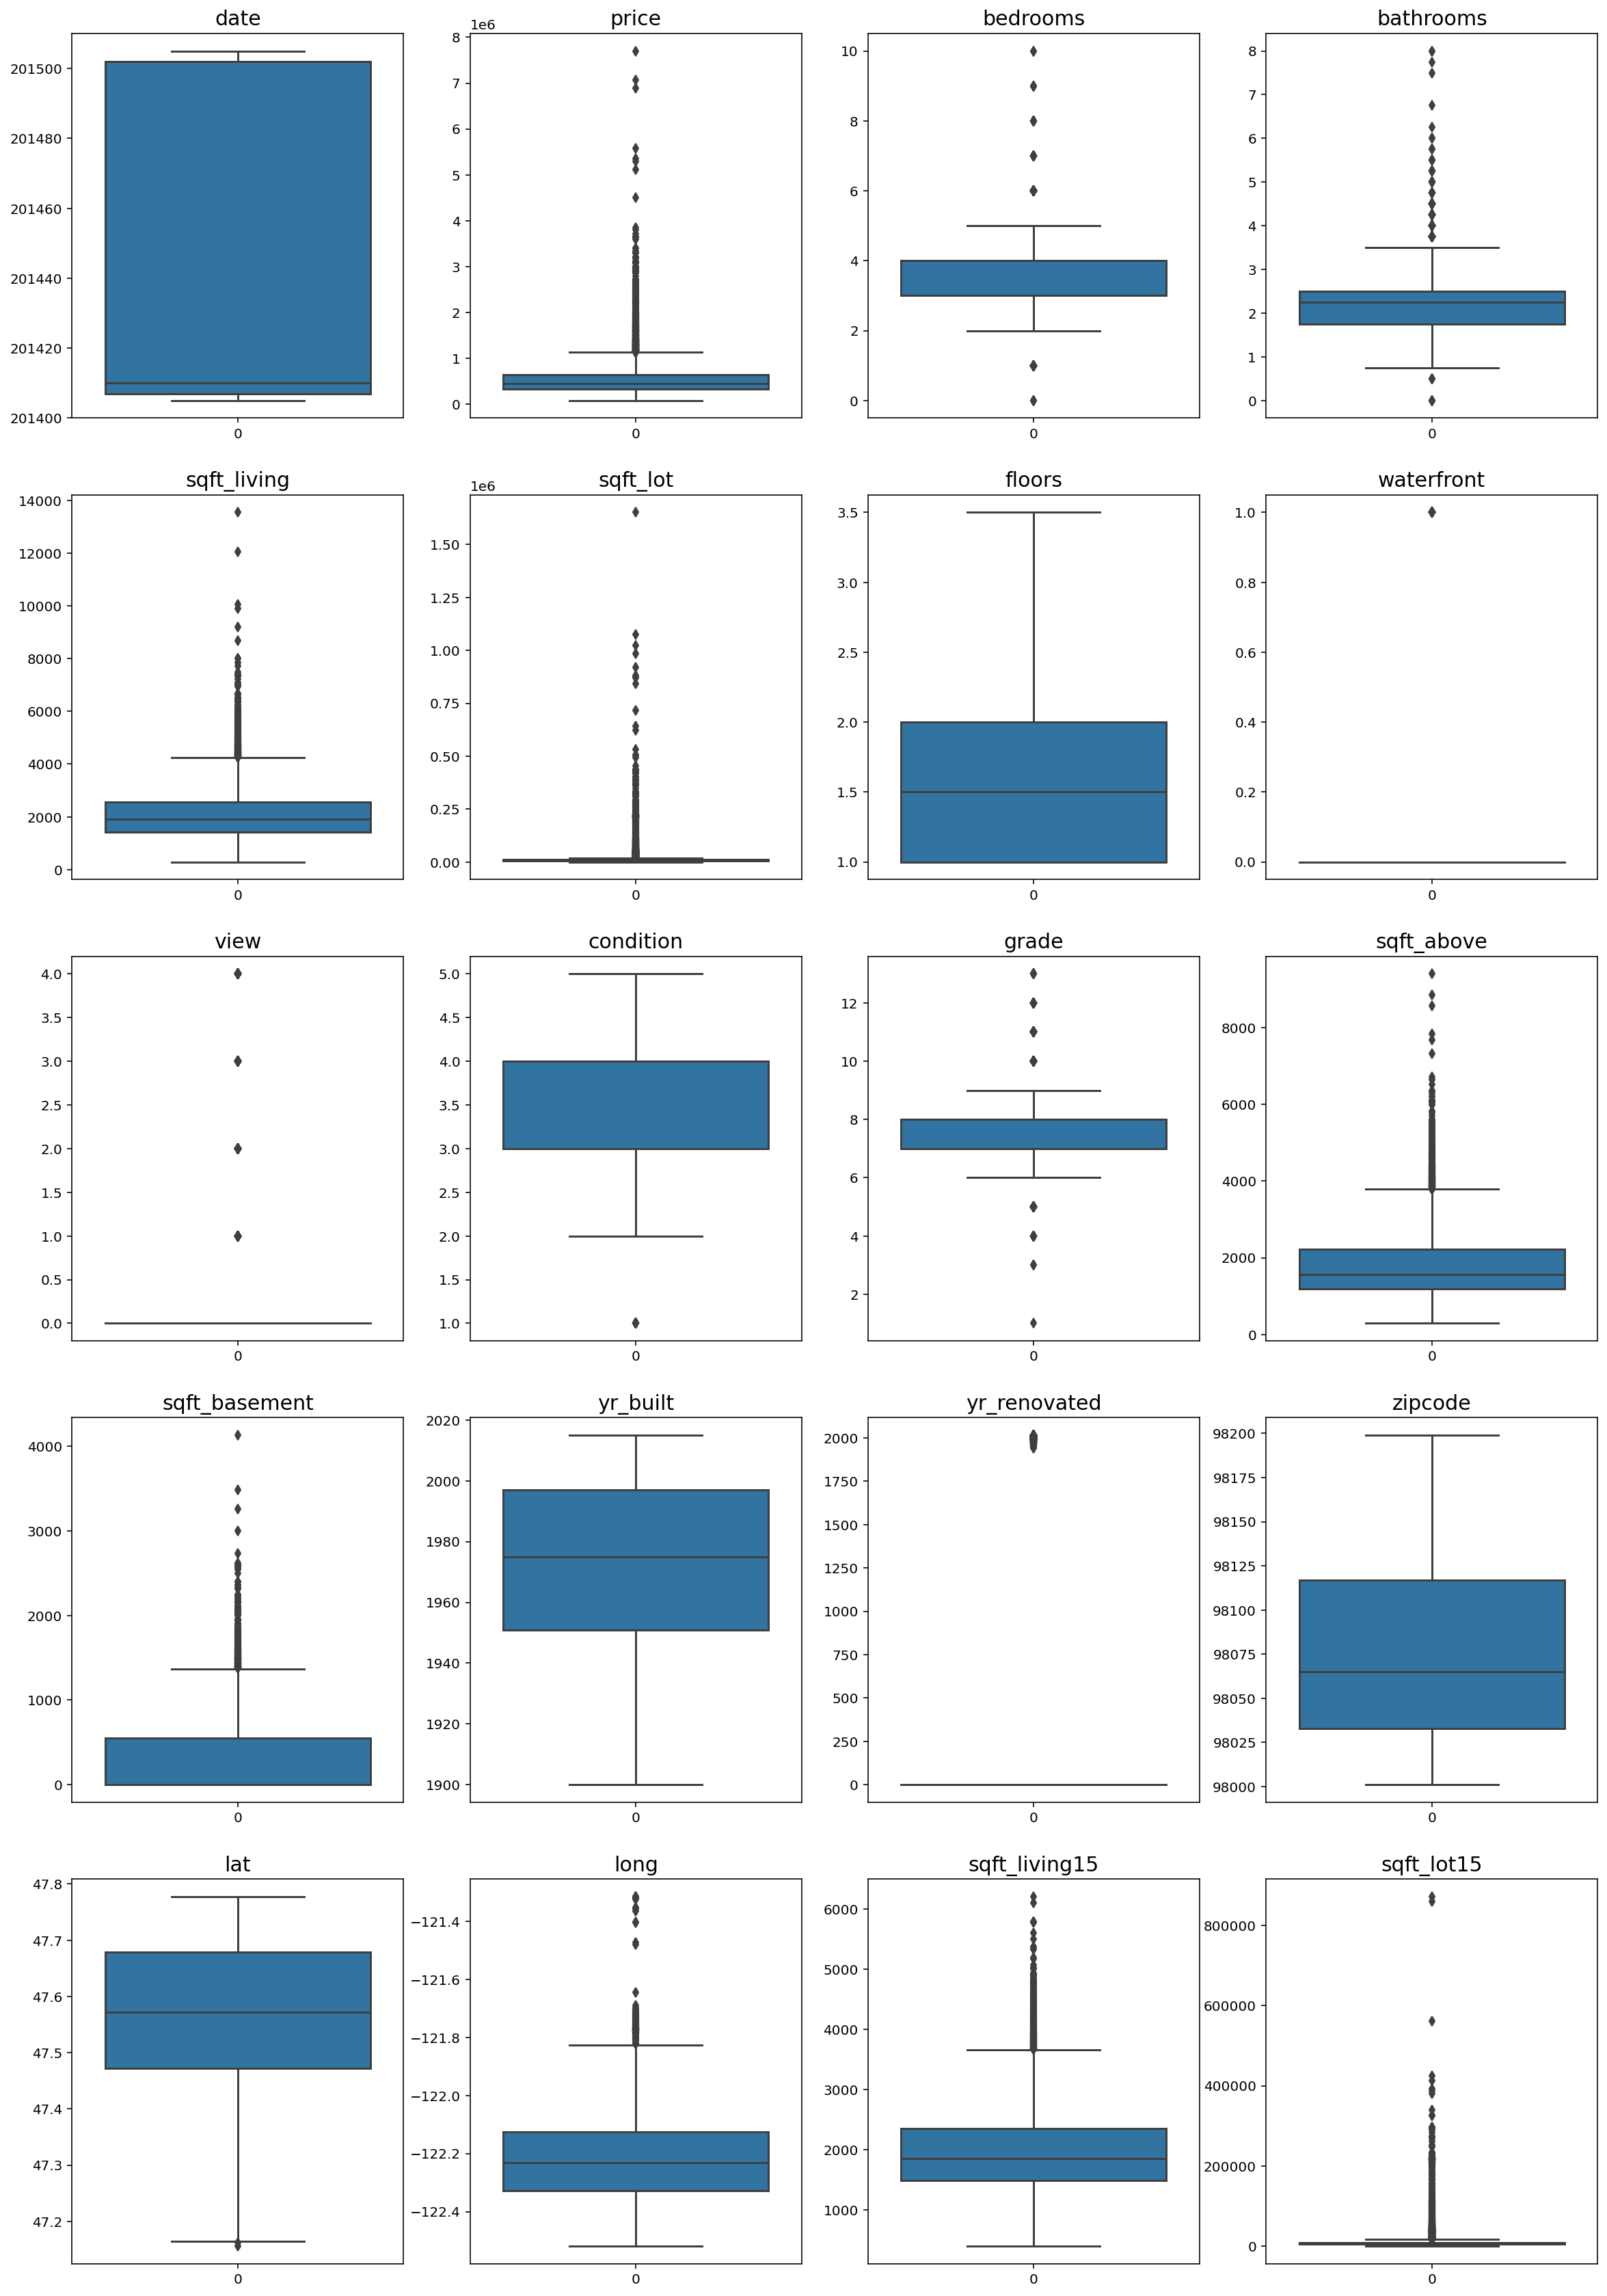

In [8]:
fig, ax = plt.subplots(5, 4, figsize=(20, 30))

count = 0
columns = train.columns
for row in range(5):
    for col in range(4):
        sns.boxplot(data=train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 20 :
            break

In [9]:
train.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,201438.545993,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,44.252050,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,201405.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,201407.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,201410.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,201502.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,201505.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
train['price'].sort_values()

10678      78000.0
339        80000.0
11293      81000.0
12841      83000.0
2674       84000.0
           ...    
1045     5350000.0
3134     5570000.0
6469     6885000.0
2775     7062500.0
5108     7700000.0
Name: price, Length: 15035, dtype: float64

In [11]:
train.drop(index = [2775], inplace = True)
train['price'].sort_values()

10678      78000.0
339        80000.0
11293      81000.0
12841      83000.0
2674       84000.0
           ...    
947      5300000.0
1045     5350000.0
3134     5570000.0
6469     6885000.0
5108     7700000.0
Name: price, Length: 15034, dtype: float64

In [12]:
train.loc[train['bedrooms'] < 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6885,201412,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
8826,201502,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675
12781,201410,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
13522,201409,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [13]:
train.drop(index = train.loc[train['bedrooms'] < 1].index, inplace = True)
train['bedrooms'].sort_values()

8124      1
10082     1
3436      1
10095     1
6316      1
         ..
3010      9
4291      9
2912      9
9280     10
10575    10
Name: bedrooms, Length: 15030, dtype: int64

In [14]:
train['bathrooms'].sort_values().head(30)

7322     0.00
4123     0.00
8137     0.50
1617     0.50
7283     0.50
15034    0.75
4779     0.75
11731    0.75
4306     0.75
11814    0.75
1915     0.75
3986     0.75
339      0.75
12517    0.75
11385    0.75
246      0.75
12533    0.75
12847    0.75
3024     0.75
2988     0.75
143      0.75
13201    0.75
3698     0.75
11208    0.75
631      0.75
2629     0.75
7931     0.75
8408     0.75
8428     0.75
8660     0.75
Name: bathrooms, dtype: float64

In [15]:
train.drop(index = train.loc[train['bathrooms'] <= 0.5].index, inplace = True)
train['bathrooms'].sort_values()

15034    0.75
4779     0.75
11731    0.75
4306     0.75
11814    0.75
         ... 
2859     6.75
5990     7.50
6469     7.75
5108     8.00
8912     8.00
Name: bathrooms, Length: 15025, dtype: float64

In [16]:
train['sqft_living'].sort_values()

631        380
14826      390
6042       410
10095      420
8016       420
         ...  
10152     8670
3134      9200
6469      9890
5108     12050
8912     13540
Name: sqft_living, Length: 15025, dtype: int64

In [17]:
train.drop(index = train.loc[train['sqft_living'] >= 12050].index, inplace = True)
train['sqft_living'].sort_values()

631       380
14826     390
6042      410
10095     420
8016      420
         ... 
1045     8000
842      8010
10152    8670
3134     9200
6469     9890
Name: sqft_living, Length: 15023, dtype: int64

In [18]:
train['sqft_lot'].sort_values()

10987        520
4118         572
5346         600
2464         609
14321        635
          ...   
4719      920423
2803      982998
5468     1024068
5392     1074218
1231     1651359
Name: sqft_lot, Length: 15023, dtype: int64

In [19]:
train.drop(index = [1231], inplace = True)
train['sqft_lot'].sort_values()

10987        520
4118         572
5346         600
2464         609
14321        635
          ...   
4989      881654
4719      920423
2803      982998
5468     1024068
5392     1074218
Name: sqft_lot, Length: 15022, dtype: int64

In [20]:
train['condition'].sort_values()

8585     1
11787    1
12748    1
3308     1
1596     1
        ..
1241     5
1245     5
1250     5
4975     5
7518     5
Name: condition, Length: 15022, dtype: int64

In [21]:
train.loc[train['condition'] == 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
271,201409,270000.0,2,1.50,1380,209959,1.0,0,0,1,6,1380,0,1954,0,98011,47.7461,-122.195,3130,19868
1040,201411,352950.0,3,1.00,1760,3000,1.5,0,0,1,6,1760,0,1900,0,98103,47.6598,-122.348,1320,1266
1242,201501,252000.0,1,1.00,680,1638,1.0,0,4,1,6,680,0,1910,1992,98116,47.5832,-122.399,1010,3621
1596,201503,535000.0,2,1.00,920,9000,1.0,0,0,1,6,920,0,1954,0,98033,47.6831,-122.189,1760,8400
2145,201412,441000.0,4,1.50,1100,3300,1.0,0,0,1,7,1100,0,1919,0,98122,47.6033,-122.295,2020,4000
2287,201405,255000.0,2,1.00,810,7980,1.0,0,0,1,6,810,0,1928,0,98146,47.4890,-122.337,1440,7980
3308,201410,125000.0,1,1.00,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440
5194,201411,295000.0,3,1.50,720,7450,1.0,0,1,1,5,720,0,1924,0,98126,47.5840,-122.375,2600,7360
8585,201501,196000.0,3,2.25,1510,9600,1.0,0,0,1,7,1090,420,1966,0,98028,47.7758,-122.238,1870,10681
9498,201407,105500.0,2,1.00,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,47.4611,-122.324,1620,8584


In [22]:
train['sqft_above'].sort_values()

631       380
14826     390
6042      410
8016      420
10095     420
         ... 
7739     6640
1045     6720
12921    7320
13809    7850
6469     8860
Name: sqft_above, Length: 15022, dtype: int64

In [23]:
train.drop(index = [6469], inplace = True)
train['sqft_above'].sort_values()

631       380
14826     390
6042      410
8016      420
10095     420
         ... 
14225    6530
7739     6640
1045     6720
12921    7320
13809    7850
Name: sqft_above, Length: 15021, dtype: int64

In [24]:
train['sqft_basement'].sort_values()

0          0
8902       0
8903       0
8904       0
8905       0
        ... 
1941    2600
2160    2620
4957    2730
3134    3000
7059    3260
Name: sqft_basement, Length: 15021, dtype: int64

In [25]:
train['lat'].sort_values().head(30)

2354     47.1559
9070     47.1622
8838     47.1647
286      47.1775
1969     47.1776
8563     47.1776
9384     47.1795
437      47.1803
6093     47.1840
13417    47.1853
4040     47.1895
3929     47.1896
5180     47.1900
3070     47.1900
9150     47.1903
2880     47.1913
232      47.1913
8804     47.1923
5391     47.1924
5608     47.1927
11746    47.1927
5112     47.1932
14767    47.1934
9548     47.1936
6434     47.1937
14855    47.1937
3452     47.1937
9810     47.1940
14500    47.1941
12749    47.1941
Name: lat, dtype: float64

In [26]:
train.drop(index = [2354, 9070, 8838], inplace = True)
train['lat'].sort_values()

286      47.1775
8563     47.1776
1969     47.1776
9384     47.1795
437      47.1803
          ...   
9034     47.7775
4273     47.7775
4803     47.7775
11004    47.7776
12128    47.7776
Name: lat, Length: 15018, dtype: float64

In [27]:
train['sqft_living15'].sort_values()

9372      399
12007     460
1385      620
12543     670
14435     690
         ... 
816      5790
3867     5790
14471    5790
7246     6110
13809    6210
Name: sqft_living15, Length: 15018, dtype: int64

In [28]:
train.drop(index = [13809, 7246], inplace = True)
train['sqft_living15'].sort_values()

9372      399
12007     460
1385      620
12543     670
14435     690
         ... 
14981    5790
816      5790
14471    5790
11446    5790
14294    5790
Name: sqft_living15, Length: 15016, dtype: int64

In [29]:
train['sqft_lot15'].sort_values()

13682       651
14415       659
377         660
14520       748
14977       750
          ...  
14900    392040
4719     411962
9384     560617
14225    858132
6779     871200
Name: sqft_lot15, Length: 15016, dtype: int64

In [30]:
train.drop(index = [6779, 14225, 9384], inplace = True)
train['sqft_lot15'].sort_values()

13682       651
14415       659
377         660
14520       748
14977       750
          ...  
2520     339332
7790     380279
12271    386812
14900    392040
4719     411962
Name: sqft_lot15, Length: 15013, dtype: int64

In [31]:
len(train.columns)

20

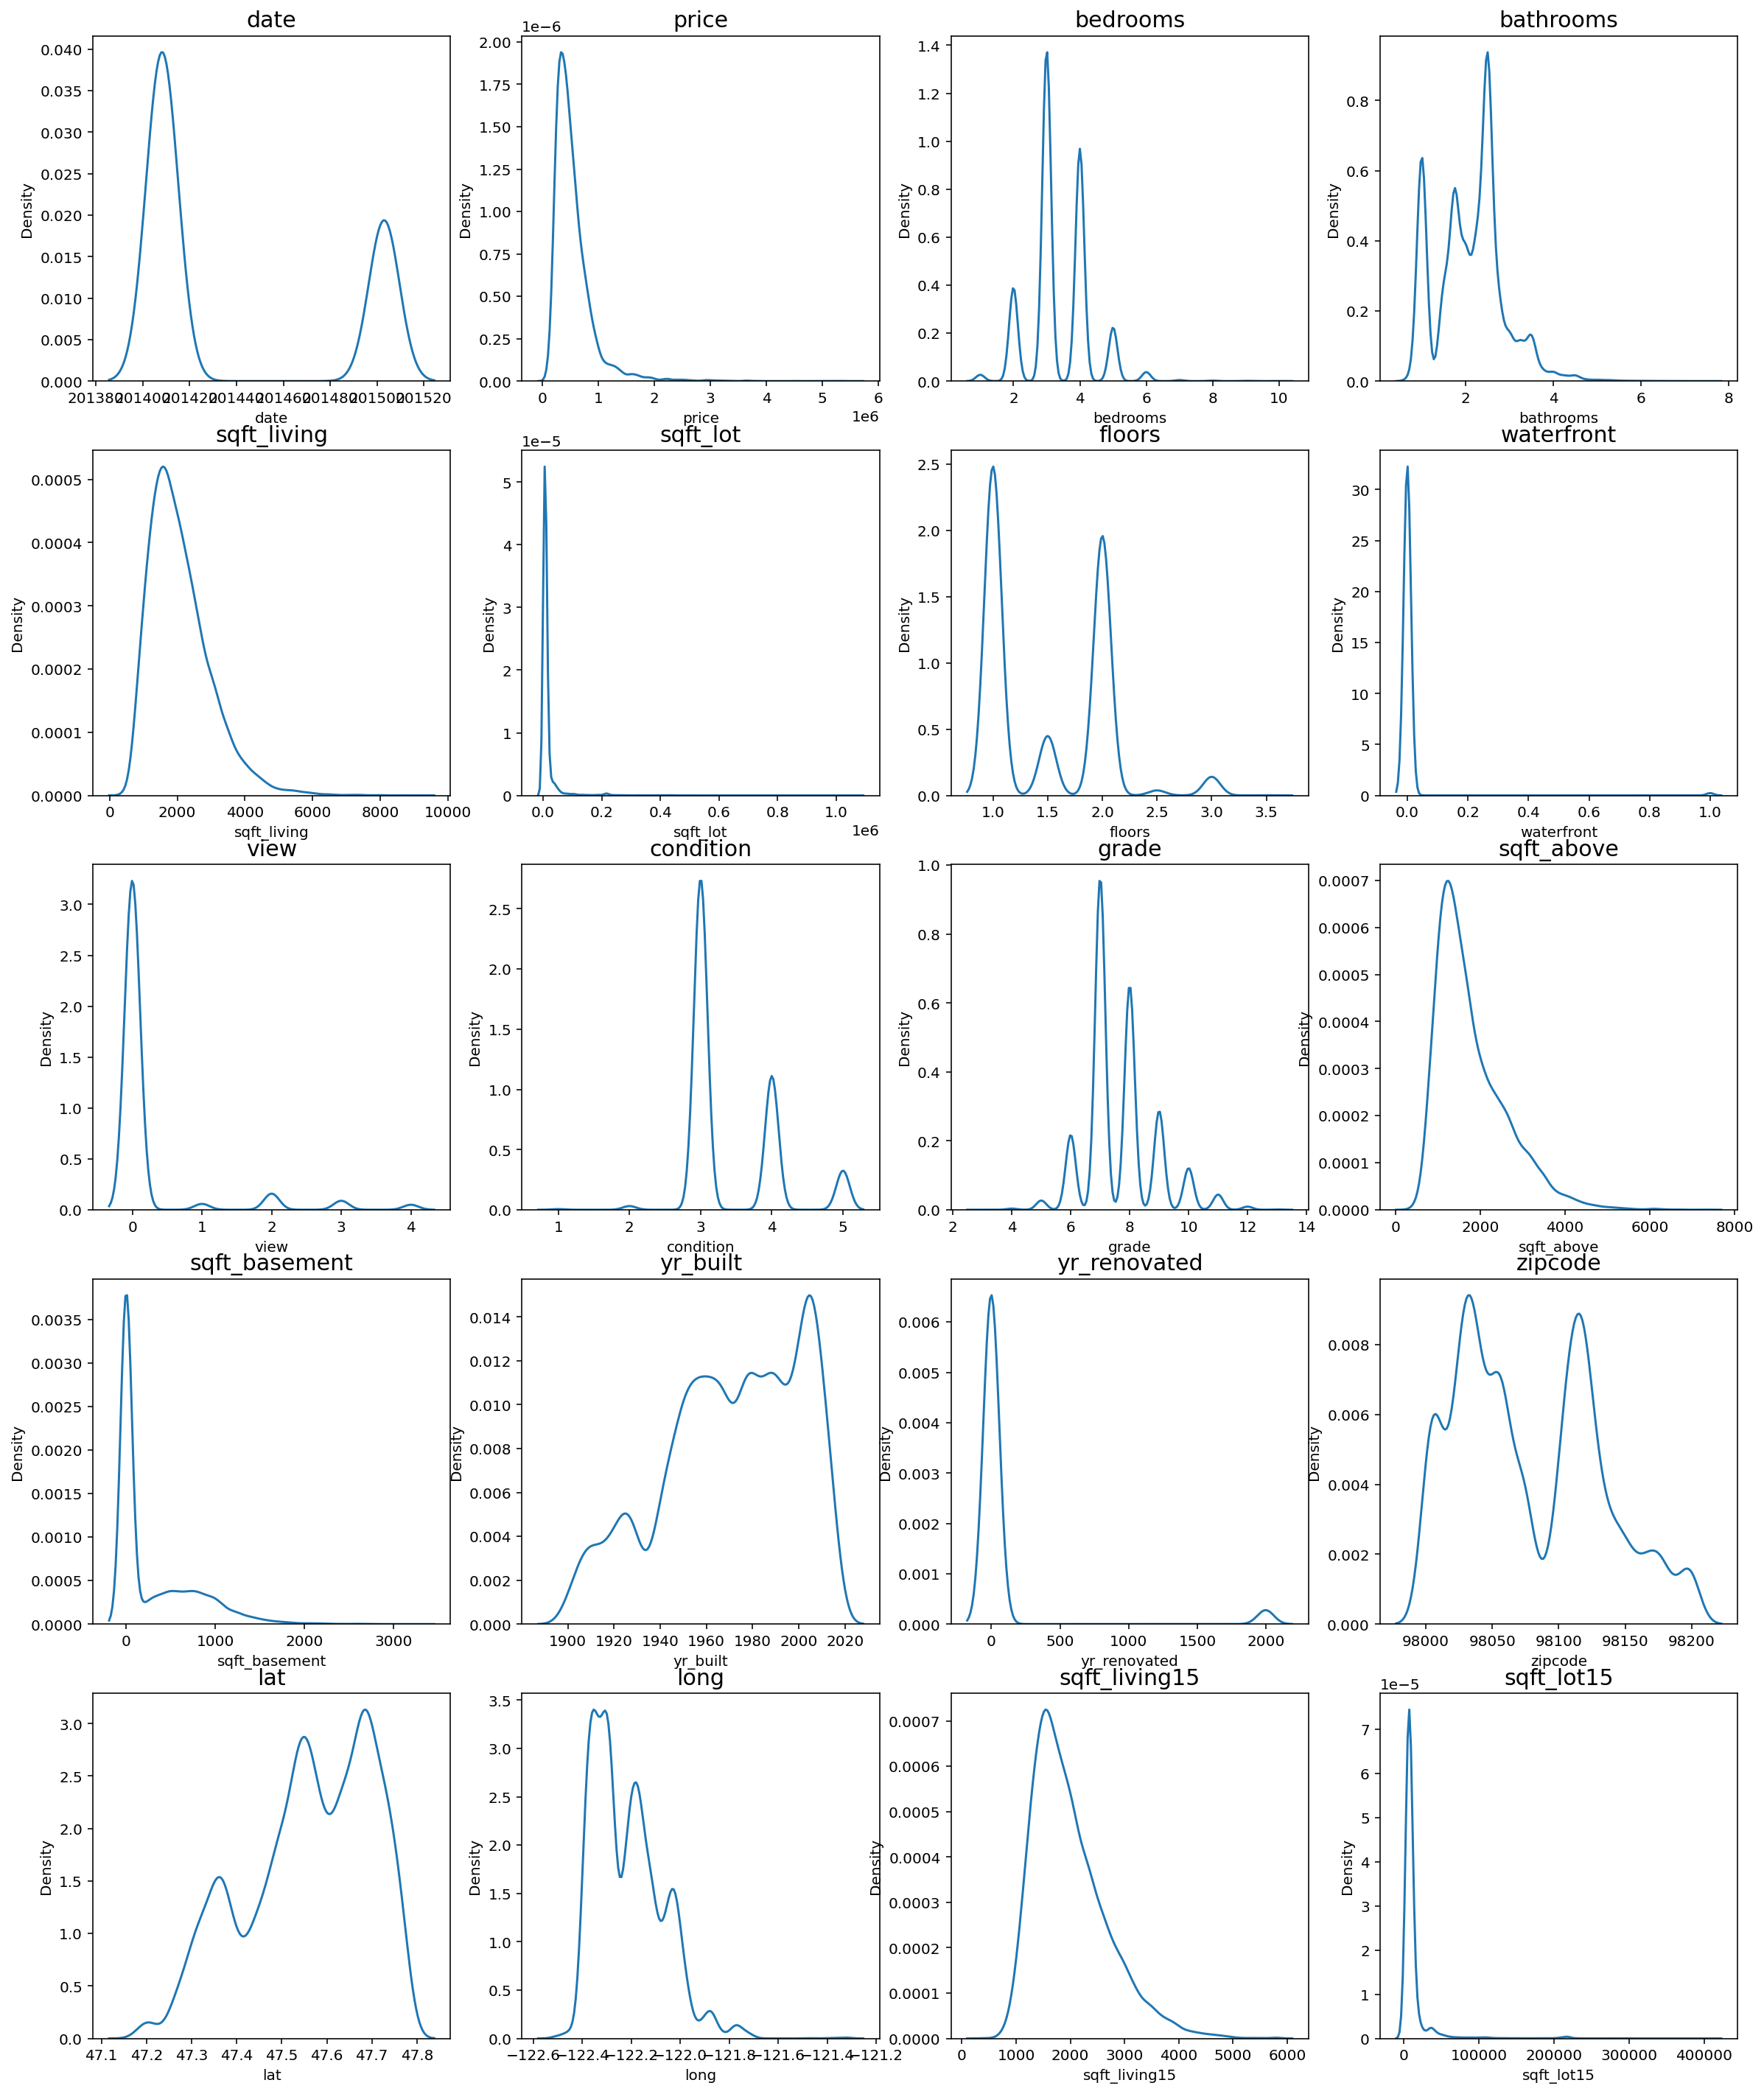

In [32]:
fig, ax = plt.subplots(5, 4, figsize=(20, 25))

count = 0
columns = train.columns
for row in range(5):
    for col in range(4):
        sns.kdeplot(data=train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 20 :
            break

In [33]:
skew_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

for c in skew_columns:
    train[c] = np.log1p(train[c].to_numpy())
    test[c] = np.log1p(test[c].to_numpy())

In [34]:
y = train['price']
del train['price']

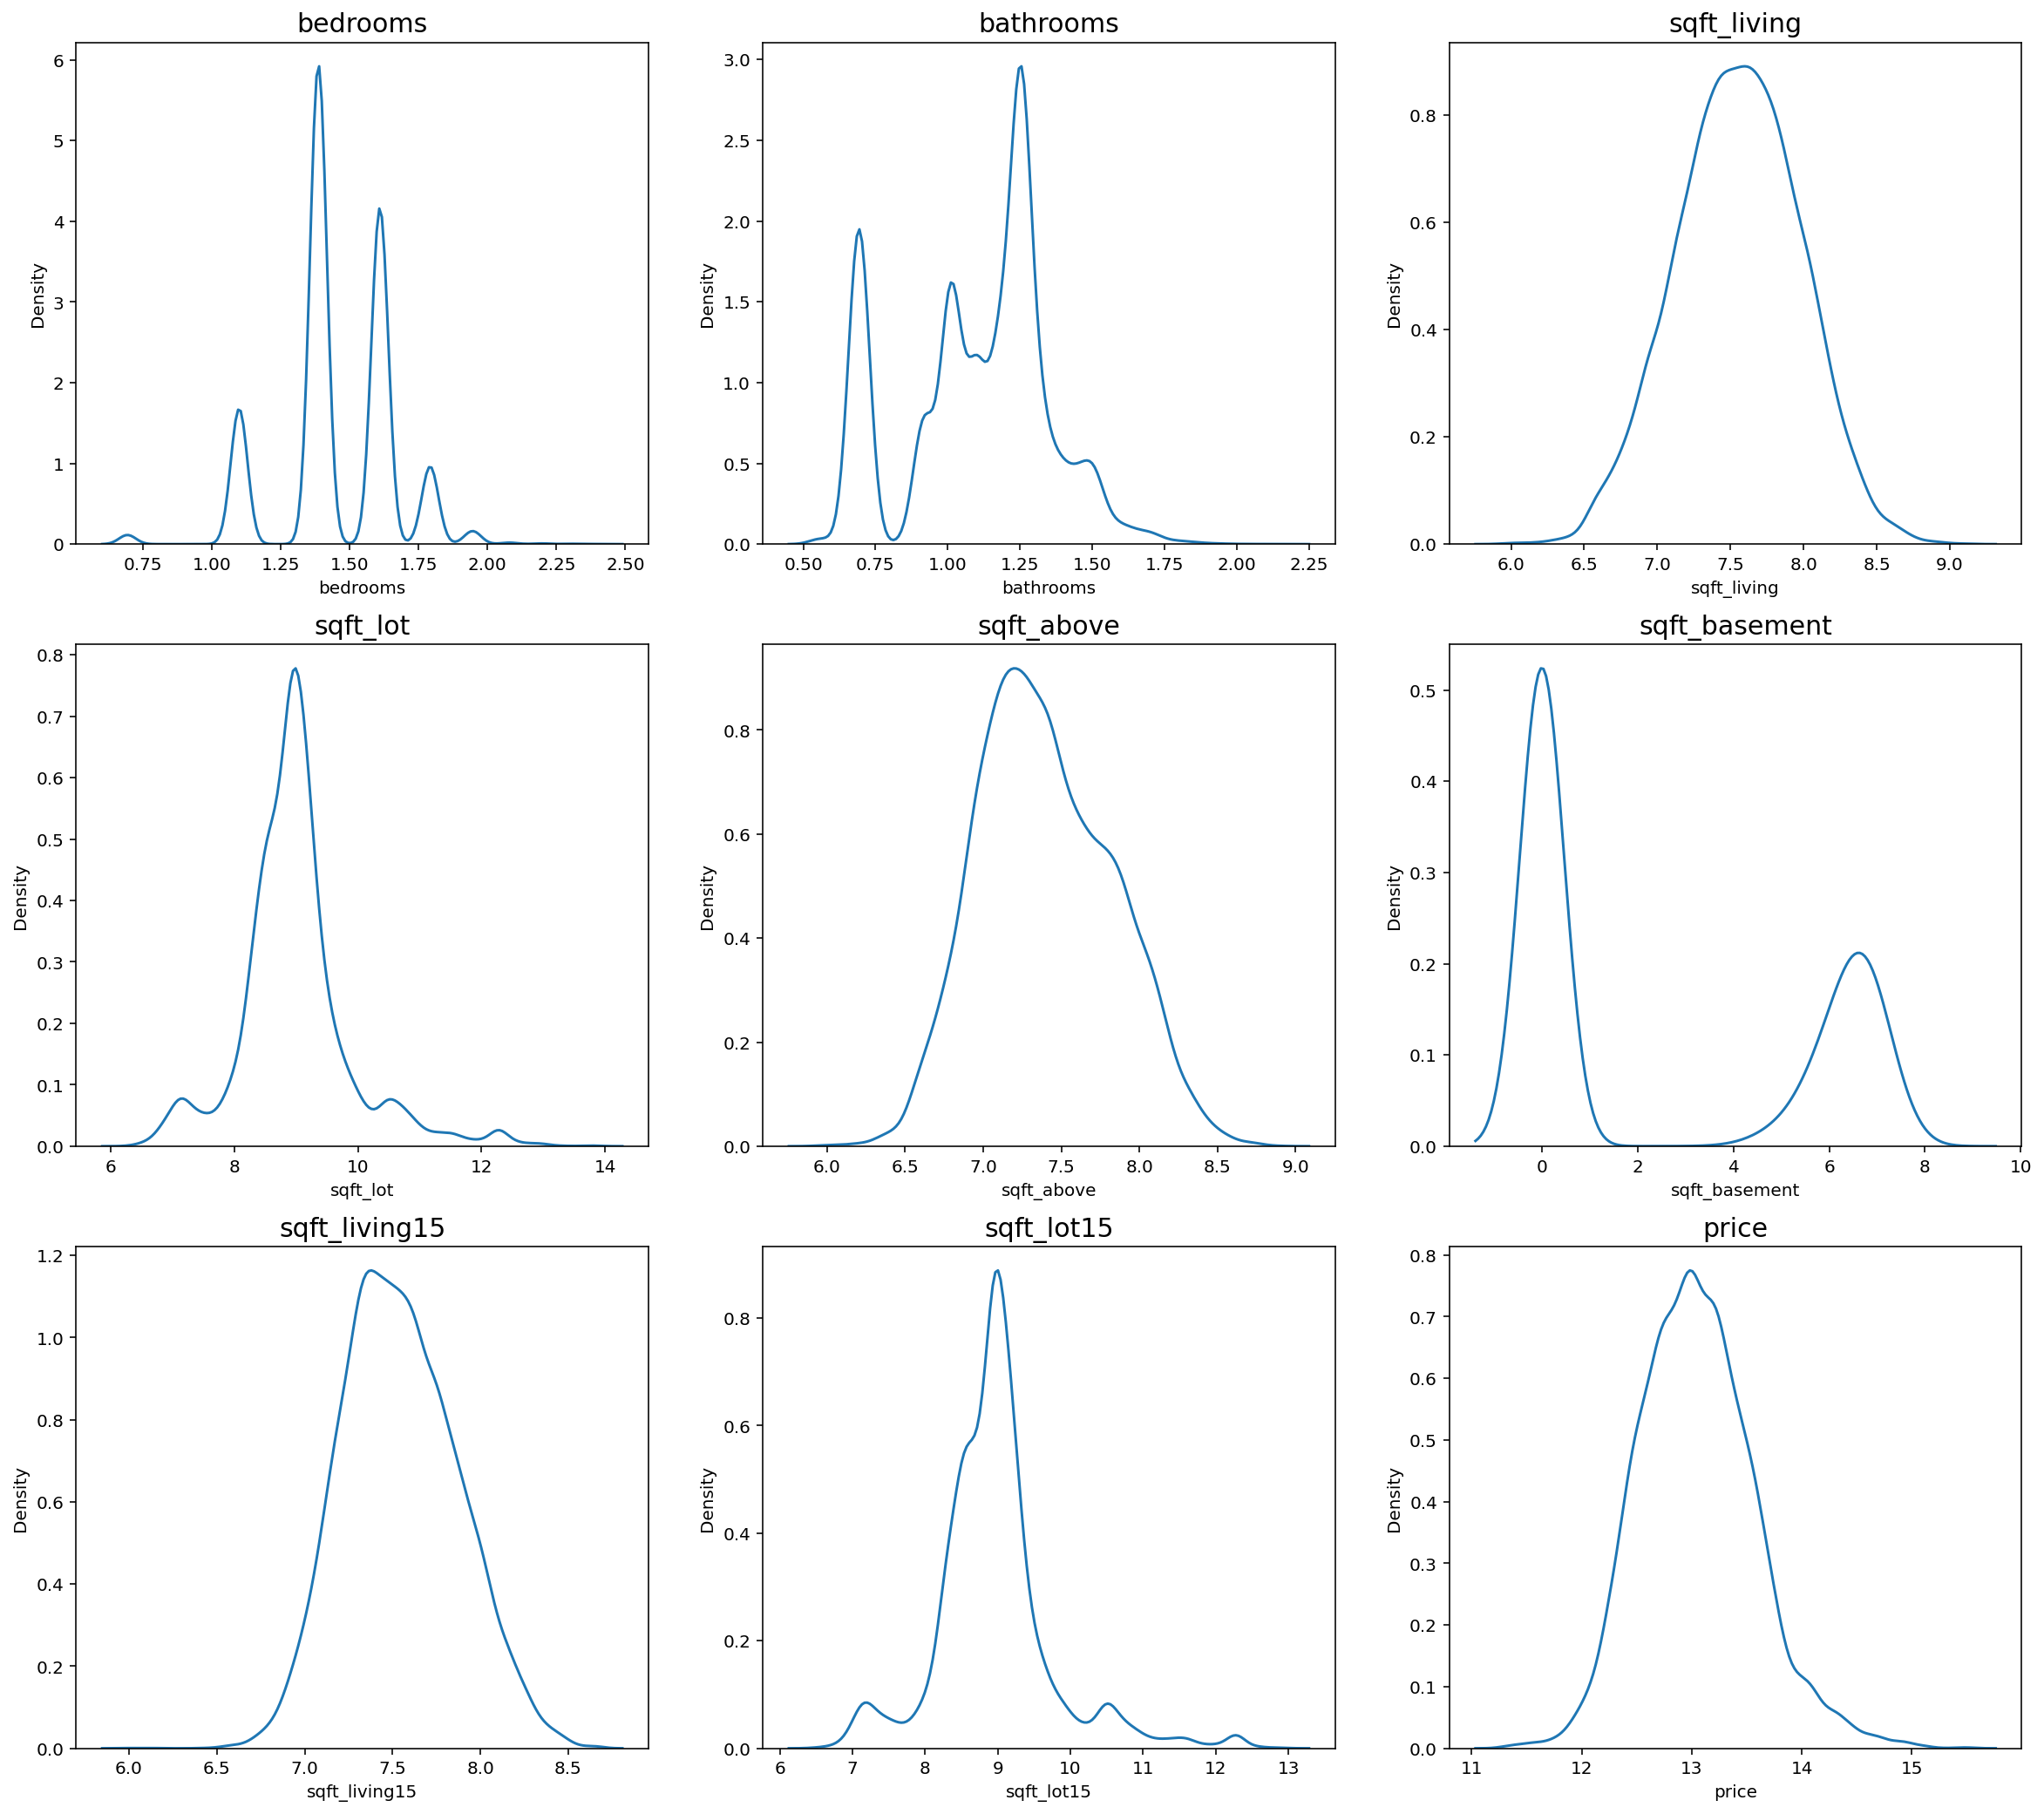

In [35]:
fig, ax = plt.subplots(3, 3, figsize=(20, 18))

count = 0
for row in range(3):
    for col in range(3):
        if count == 8:
            break
        sns.kdeplot(data = train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1

y = np.log1p(y)
sns.kdeplot(data=y, ax=ax[2][2])
ax[2][2].set_title('price', fontsize=15)
plt.show()

In [36]:
train.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [37]:
test.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [38]:
train['totalroom'] = train['bedrooms'] + train['bathrooms']
test['totalroom'] = test['bedrooms'] + test['bathrooms']

In [39]:
train['state'] = train['grade'] * train['sqft_living']
test['state'] = test['grade'] * test['sqft_living']

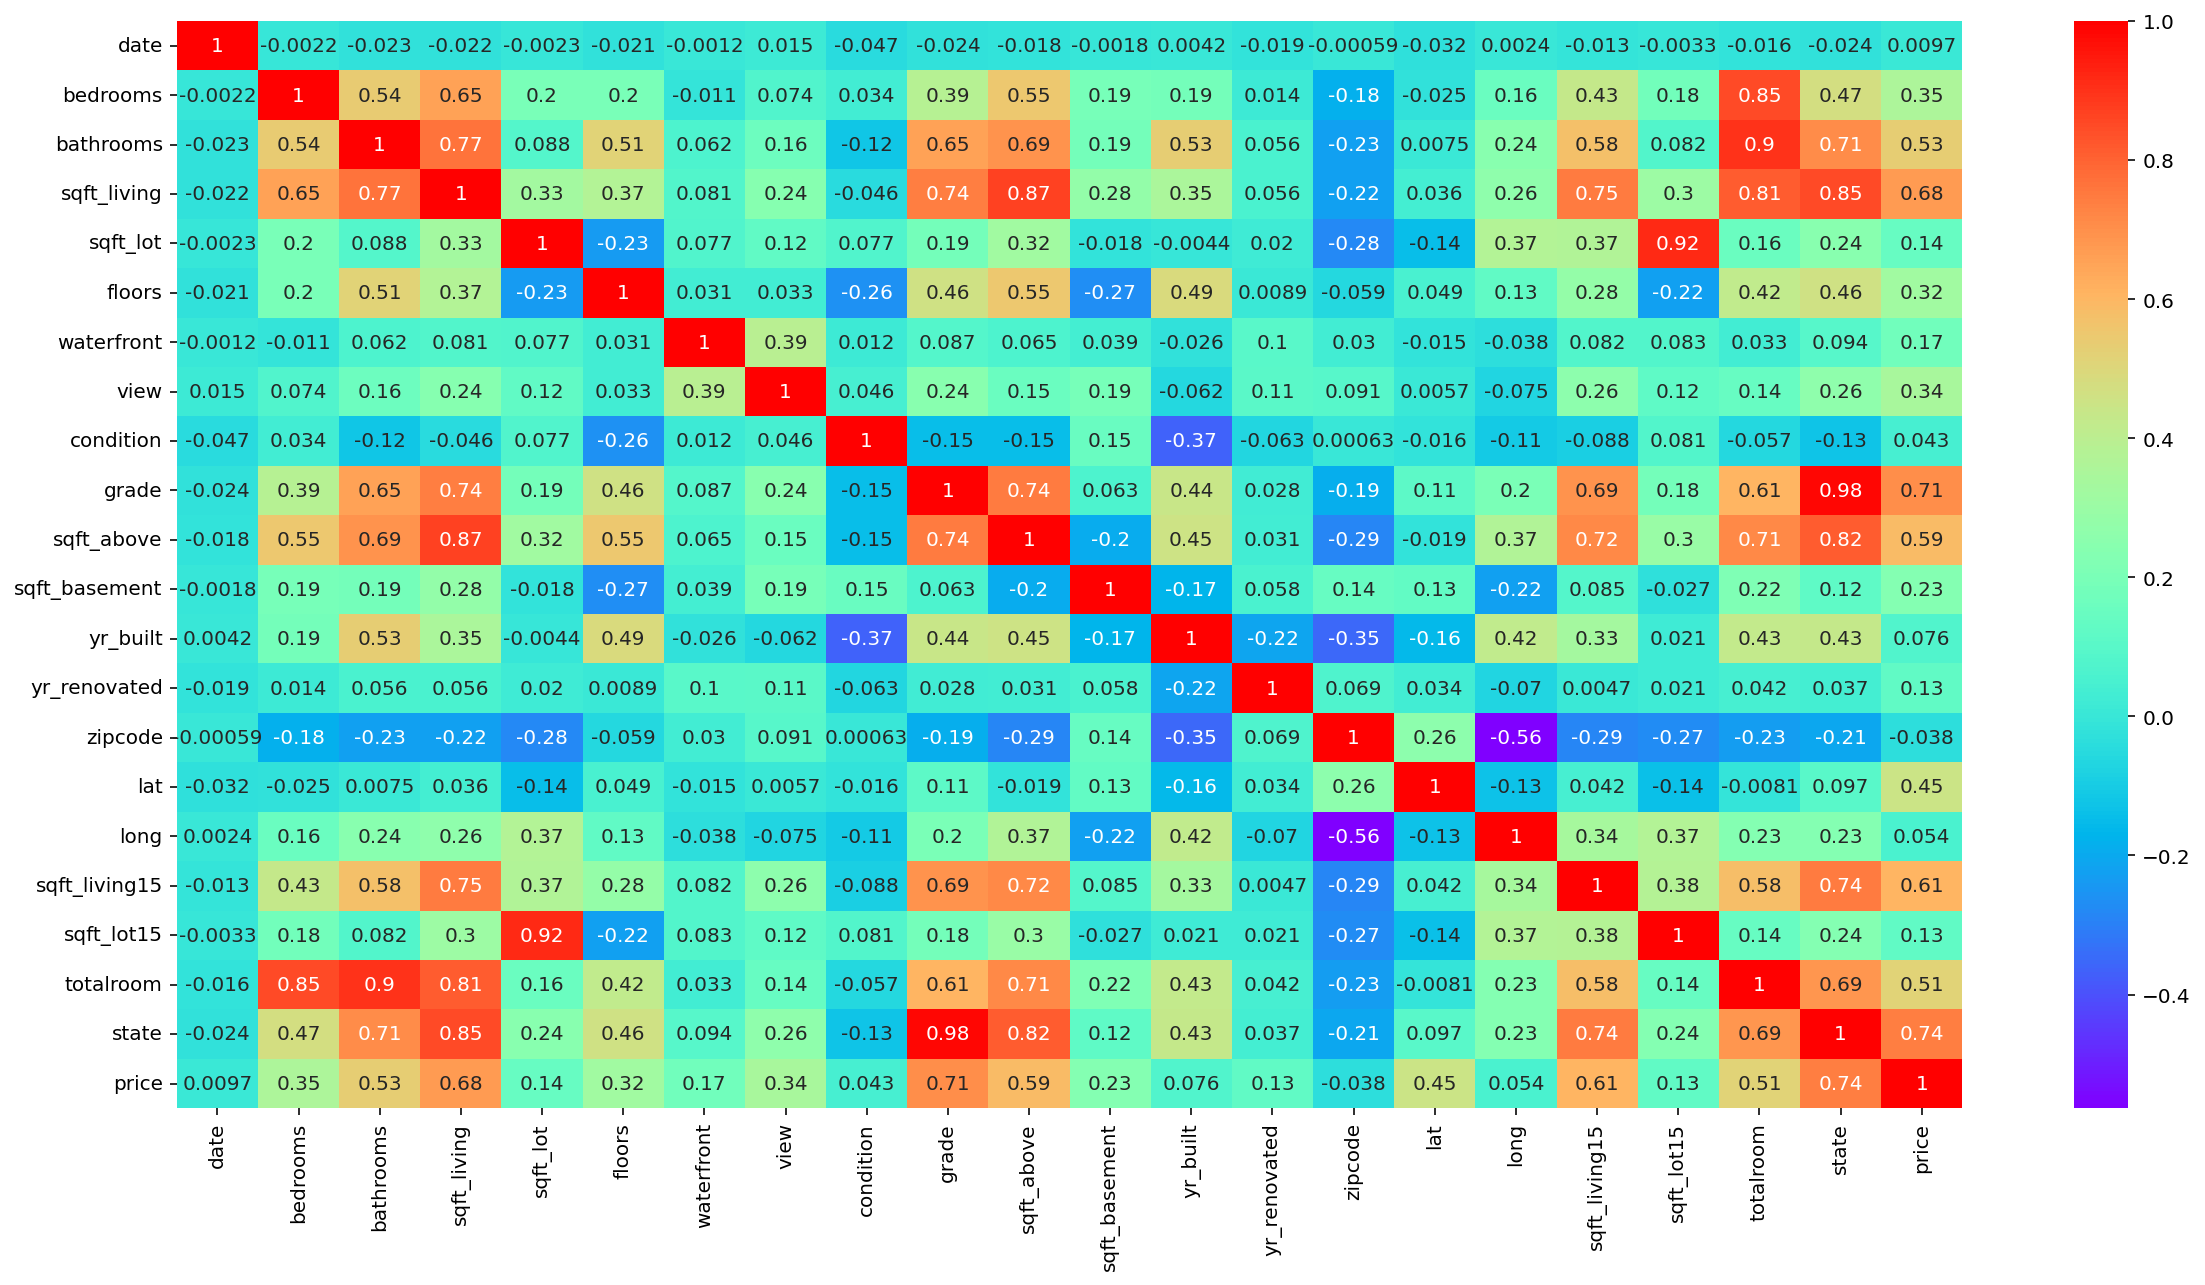

In [40]:
plt.figure(figsize=(20, 10))
train['price'] = y
corr = train.corr()
sns.heatmap(corr, annot = True, cmap = 'rainbow')
plt.show()
del train['price']

In [41]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [42]:
random_state=2020
ada = AdaBoostRegressor(random_state=random_state)
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [ada, gboost, xgboost, lightgbm, rdforest]

In [43]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

,RMSE
AdaBoostRegressor,186797.005424
GradientBoostingRegressor,126003.097198
RandomForestRegressor,121209.713521
XGBRegressor,110970.794205
LGBMRegressor,103261.976566


In [44]:
def my_RandomSearch(model, train, y, params, verbose=2, n_jobs=5):
    
    random_model = RandomizedSearchCV(model, params, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=verbose, n_jobs=n_jobs)
    
    random_model.fit(train, y)
    
    params = random_model.cv_results_['params']
    score = random_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [45]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [46]:
model = ada
ada_params={'learning_rate':[0.07, 0.05],
        'n_estimators':[50, 100, 200]
        }
my_RandomSearch(model, train, y, ada_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,n_estimators,learning_rate,score,RMSLE
2,200,0.07,-0.067738,0.260266
5,200,0.05,-0.068567,0.261854
1,100,0.07,-0.070188,0.264930
4,100,0.05,-0.071900,0.268143
0,50,0.07,-0.075130,0.274099
3,50,0.05,-0.077037,0.277555


In [47]:
ada = AdaBoostRegressor(random_state=random_state, n_estimators = 200, learning_rate = 0.07)

In [48]:
model = gboost
g_params={'learning_rate':[0.07, 0.05], 
        'max_depth':[1, 3, 5, 7, 10], 
        'n_estimators':[50, 100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }
my_RandomSearch(model, train, y, g_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,subsample,n_estimators,max_depth,learning_rate,score,RMSLE
0,0.8,200,7,0.05,-0.026848,0.163853
8,0.9,200,5,0.07,-0.027350,0.165377
9,0.7,100,7,0.05,-0.028312,0.168263
5,0.9,100,10,0.07,-0.028986,0.170254
2,0.8,50,10,0.05,-0.032085,0.179124
7,0.9,200,3,0.05,-0.033285,0.182441
6,0.7,100,3,0.07,-0.035755,0.189089
4,0.7,200,1,0.07,-0.048695,0.220670
3,0.7,200,1,0.05,-0.054300,0.233023
1,0.7,50,1,0.05,-0.101597,0.318742


In [58]:
gboost = GradientBoostingRegressor(random_state=random_state, subsample = 0.8, n_estimators = 200, max_depth = 7, learning_rate = 0.05)

In [50]:
model = xgboost
xgb_params={
        'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.9],
        'eval_metric' : ['rmse'],
        'boosting_type' : ['gbtree', 'gblinear', 'dart']
        }
my_RandomSearch(model, train, y, xgb_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warni

[10:31:29] WARNING: ../src/learner.cc:573: 
Parameters: { "boosting_type" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,learning_rate,eval_metric,boosting_type,score,RMSLE
0,0.1000,rmse,gbtree,-0.027705,0.166448
4,0.1000,rmse,dart,-0.027705,0.166448
7,0.1000,rmse,gblinear,-0.027705,0.166448
5,0.9000,rmse,gblinear,-0.044643,0.211290
8,0.9000,rmse,dart,-0.044643,0.211290
1,0.0100,rmse,gblinear,-21.211105,4.605552
6,0.0100,rmse,gbtree,-21.211105,4.605552
2,0.0010,rmse,dart,-129.140178,11.363986
3,0.0010,rmse,gblinear,-129.140178,11.363986
9,0.0001,rmse,dart,-154.594038,12.433585


In [59]:
xgboost = XGBRegressor(random_state=random_state, learning_rate = 0.1, eval_metric = 'rmse', boosting_type = 'gbtree')

In [52]:
model = lightgbm
light_params={
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.9],
        'eval_metric' : ['rmse'],
        'boosting' : ['gbdt', 'dart']
        }
my_RandomSearch(model, train, y, light_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................learning_rate=0.07, n_estimators=50; total time=  10.8s
[CV] END ...............learning_rate=0.07, n_estimators=100; total time=  21.0s
[CV] END ...............learning_rate=0.07, n_estimators=200; total time=  36.6s
[CV] END ................learning_rate=0.05, n_estimators=50; total time=  10.2s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=  19.1s
[CV] END ...............learning_rate=0.05, n_estimators=200; total time=  33.7s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=1, n_estimators=50, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=  23.2s
[CV] END learning_rate=0.05, max_depth=1, n_estimators=200, subsample=0.7; total time=  10.2s
[CV] END learning_rate=0.07, max_depth=1, n_estimators=200, subsample=0.7; tot

,learning_rate,eval_metric,boosting,score,RMSLE
3,0.1000,rmse,gbdt,-0.026802,0.163714
9,0.9000,rmse,dart,-0.031140,0.176465
4,0.9000,rmse,gbdt,-0.044305,0.210489
2,0.0100,rmse,gbdt,-0.079630,0.282188
1,0.0010,rmse,gbdt,-0.236777,0.486597
0,0.0001,rmse,gbdt,-0.272034,0.521569
8,0.1000,rmse,dart,-0.639614,0.799759
7,0.0100,rmse,dart,-18.180866,4.263903
6,0.0010,rmse,dart,-33.548073,5.792070
5,0.0001,rmse,dart,-35.779314,5.981581


In [60]:
lightgbm = LGBMRegressor(random_state=random_state, learning_rate = 0.1, objective = 'rmse', boosting = 'gbdt')

In [54]:
model = rdforest
rd_params={
        'max_depth':[1, 3, 5, 7, 10], 
        'n_estimators':[50, 100, 200],
        }
my_RandomSearch(model, train, y, rd_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................learning_rate=0.07, n_estimators=50; total time=   9.7s
[CV] END ...............learning_rate=0.07, n_estimators=100; total time=  19.0s
[CV] END ...............learning_rate=0.07, n_estimators=200; total time=  37.0s
[CV] END ................learning_rate=0.05, n_estimators=50; total time=  10.1s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=  18.2s
[CV] END ...............learning_rate=0.05, n_estimators=200; total time=  36.9s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=1, n_estimators=50, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.8; total time=  23.8s
[CV] END learning_rate=0.05, max_depth=1, n_estimators=200, subsample=0.7; total time=   8.8s
[CV] END learning_rate=0.07, max_depth=1, n_estimators=200, subsample=0.7; tot

,n_estimators,max_depth,score,RMSLE
4,200,10,-0.034233,0.185020
6,200,7,-0.041890,0.204671
7,100,7,-0.041893,0.204678
3,50,7,-0.042049,0.205057
0,200,5,-0.054302,0.233029
5,50,5,-0.054440,0.233323
2,100,3,-0.080524,0.283768
8,200,3,-0.080545,0.283804
9,50,3,-0.080894,0.284420
1,200,1,-0.173095,0.416047


In [61]:
rdforest = RandomForestRegressor(random_state=random_state, n_estimators = 200, max_depth = 10)

In [62]:
models = [ada, gboost, xgboost, lightgbm, rdforest]

get_scores(models, train, y)

[10:37:41] WARNING: ../src/learner.cc:573: 
Parameters: { "boosting_type" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


,RMSE
AdaBoostRegressor,190240.589328
RandomForestRegressor,126885.904157
XGBRegressor,111353.244208
GradientBoostingRegressor,105297.909115
LGBMRegressor,103261.976566


In [63]:
save_submission(lightgbm, train, y, test, 'LGBMRegressor', rmsle='103261.976566')

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
/aiffel/aiffel/kaggle_kakr_housing/data/submission_LGBMRegressor_RMSLE_103261.976566.csv saved!


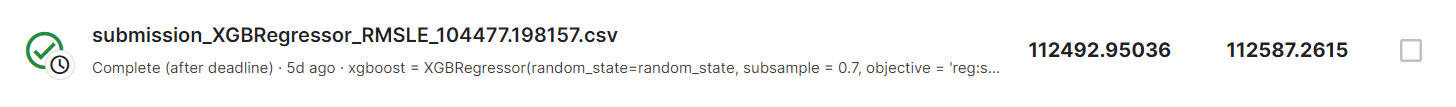

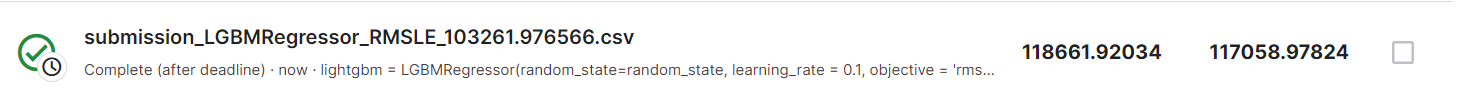

도대체 왜... 절대 낮아지지 않았다.